In [1]:
"""Riccardo Venturi; ##youtube-Logan_Dihel::reference """
#Simple pendulum without external forces
#°Euler_lagrange equation
#Simple Pendulum with Python + Sympy,
#Aggiungere la fase se si ha voglia, io no
from sympy import *
from sympy.physics.continuum_mechanics import *

#enable latex printing
init_printing()

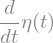

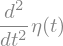

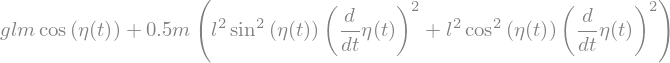

In [2]:
m, g, l, t=symbols('m g l t')
from sympy.physics.mechanics import dynamicsymbols
eta=dynamicsymbols('eta')
 #posizione pendolo x,y, uso lagrangiana per la massa
 
x_m=l*sin(eta)
y_m=-l*cos(eta)
#derivative
xm_dot=diff(x_m, t)
ym_dot=diff(y_m, t)
 
eta_dot=diff(eta, t)
eta_ddot=diff(eta_dot, t)
#LAgrangiana uso energia pot e cinetica e linearizzo ODE, molto più facile di usare le forze
#v^2=x_velocità^2+y_velocità^2
#K=cinetica U=potenziale E=totale
K=1/2*m*(xm_dot**2 + ym_dot**2)
U=-m*g*y_m
E=U+K
display(x_m, y_m)
display(eta_dot, eta_ddot)
display(E)

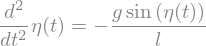

In [3]:
#equazione eulerooo-lagrange
eqn=diff(diff(E, eta_dot), t) -diff(E, eta)
#solution
sln=solve(eqn, eta_ddot)[0]
Eq(eta_ddot, sln)


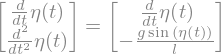

In [4]:
#system of odes as in me564 , metodo taylor e sostituzione variabili x=x0, x-dot=x1, x-ddot=x1-dot etc...
x=Matrix([eta, eta_dot])
x_dot=diff(x,t)
Eq(x_dot,Matrix([eta_dot,sln]))


In [2]:
import numpy as np
from scipy.integrate import solve_ivp

# Constants
l = 1         # Length of the pendulum
g = 9.8192    # Gravitational acceleration

# Initial Conditions
# Convert degrees to radians, starting from 45 degrees
eta_0 = np.deg2rad(70)
# Initial angular velocity
eta_dot_0 = 0

# System of ODEs
# y[0], y[1] = eta, eta_dot
def pendolo_Ode_semplice(t, y):
    return (y[1], -g * np.sin(y[0]) / l)

# Solve ODE at 30 fps
sol = solve_ivp(pendolo_Ode_semplice, [0, 5], [eta_0, eta_dot_0], t_eval=np.linspace(0, 5, 30 * 60))

# Output from the solver
eta = sol.y[0]
eta_dot = sol.y[1]
t = sol.t

# Convert radians to degrees
eta_deg = np.rad2deg(eta)
eta_dot_deg = np.rad2deg(eta_dot)

# Save eta in a file for study
np.savetxt('pendolo_semplice.csv', np.transpose([eta_deg, eta_dot_deg]), delimiter=',')


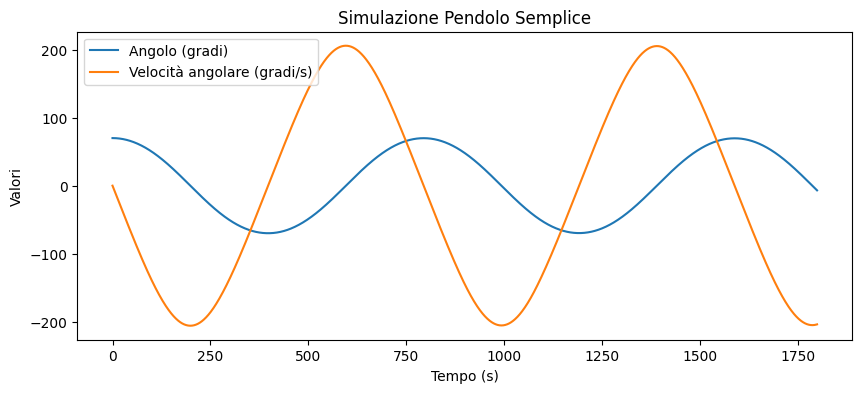

'devo mettere labels etc devo capire come fare senza incasinare su non ho voglia adesso'

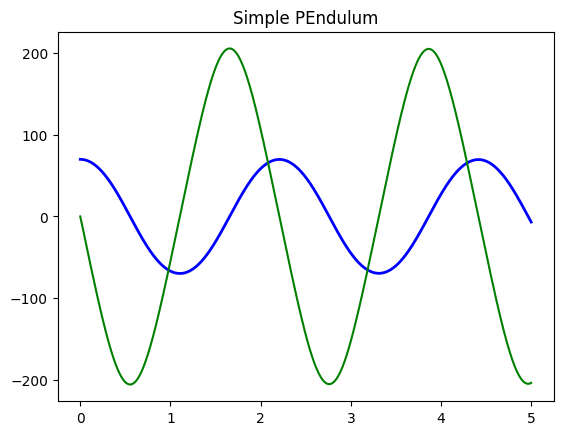

In [3]:
#°°plottiamo la vita
#metodo gpt 1
import numpy as np
import matplotlib.pyplot as plt

# Leggi i dati dal file
data = np.loadtxt('pendolo_semplice.csv', delimiter=',')

# Estrai i dati di eta e eta_dot
eta_deg = data[:, 0]
eta_dot_deg = data[:, 1]

# Crea un grafico del tempo vs eta
plt.figure(figsize=(10, 4))
plt.plot(eta_deg, label='Angolo (gradi)')
plt.plot(eta_dot_deg, label='Velocità angolare (gradi/s)')
plt.title('Simulazione Pendolo Semplice')
plt.xlabel('Tempo (s)')
plt.ylabel('Valori')
plt.legend()
plt.show()
#metodo https://www.youtube.com/watch?v=WNJJuSWfuTY&list=PLb1f9nCDJiAtMum_n9U3y3ktrBaIzeVmk&index=5
plt.plot(t, eta_deg, 'b', lw=2, label=b'$\eta$')
"""plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.title('Pendulum Motion')
plt.show()"""
plt.plot(t, eta_dot_deg, 'g', lw=1.5, label=r'$\dot \eta$')
plt.title('Simple PEndulum')
"""devo mettere labels etc devo capire come fare senza incasinare su non ho voglia adesso"""


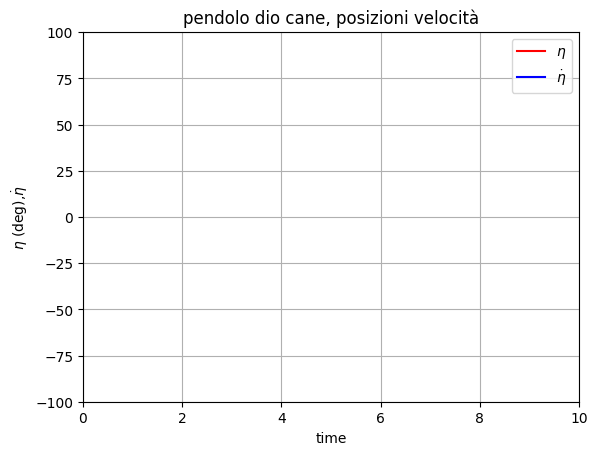

In [4]:
#animate import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter
fig, ax = plt.subplots()

eta_curve, = ax.plot(t[0], eta_deg[0], 'r')
eta_dot_curve,= ax.plot(t[0], eta_dot_deg[0], 'b')

ax.set_title('pendolo dio cane, posizioni velocità')
ax.set_xlim(0,10)
ax.set_ylim(-100,100)
ax.set_xlabel('time')
ax.set_ylabel(r'$\eta$ (deg),$\dot \eta$')
ax.legend([r'$\eta$', r'$\dot \eta$'])
ax.grid()

def animate(i):
    eta_curve.set_data(t[:i+1], eta_deg[:i+1])
    eta_dot_curve.set_data(t[:i+1], eta_dot_deg[:i+1])
#save video 30fps
ani=FuncAnimation(fig, animate, frames=len(t))
ffmpeg_writer = FFMpegWriter(fps=30)
ani.save('time_domain.mp4', writer=ffmpeg_writer)


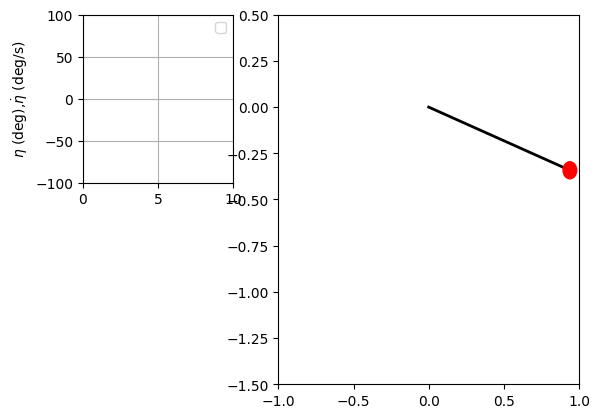

In [5]:
#pendolo che swingaaaaaaaaaaaaaa
#pendolo che swingaaaaaaaaaaaaaa
#pendolo che swingaaaaaaaaaaaaaa
#pendolo che swingaaaaaaaaaaaaaa
#compeltp
import matplotlib.pyplot as plt

import matplotlib.gridspec as gridspec
fig = plt.figure()
gs = gridspec.GridSpec(2,2, width_ratios=[1,2], height_ratios=[1,1])
ax0 = fig.add_subplot(gs[0,0])

ax0.set_xlim(0,10)
ax0.set_ylim(-100,100)
#ax0.set_xlabel('time')
ax0.set_ylabel(r'$\eta$ (deg),$\dot \eta$ (deg/s)')
ax0.legend([r'$\eta$', r'$\dot \eta$'])
ax0.grid()

eta_curve, = ax0.plot(t[0], eta_deg[0], 'b')

eta_dot_curve, = ax0.plot(t[0], eta_dot_deg[0], 'g')
#pennduuulummm
def pend_pos(eta):
    return (l*np.sin(eta), -l*np.cos(eta))
ax2 = fig.add_subplot(gs[:,1])
ax2.set_xlim(-1,1)
ax2.set_ylim(-1.5,0.5)
#disegno del pendolo
x0, y0=pend_pos(eta_0)
line, = ax2.plot([0,x0],[0,y0],lw=2,c='k')
circle = ax2.add_patch(plt.Circle(pend_pos(eta_0),0.05,fc='r',zorder = 3))

def animate(i):
    eta_curve.set_data(t[:i+1], eta_deg[:i+1])
    eta_dot_curve.set_data(t[:i+1], eta_dot_deg[:i+1])
    
    x,y = pend_pos(eta[i])
    line.set_data([0, x], [0, y])
    circle.set_center((x,y))
    
#save a video 35fps
ani=FuncAnimation(fig, animate, frames=len(t))
ffmpeg_writer = FFMpegWriter(fps=35)
ani.save('all_Pendulum_togheter_jupyter.mp4', writer=ffmpeg_writer)